# Negative Binomial Distribution

* Discrete probability distribution
* Number of successes in a sequence of IID distributed Bernoulli samples before a specified number of failures

In [3]:
# Import the required libraries
library(ggplot2)
library(MCMCvis)
library(rjags)

# Ensure the figures are easy to view in the notebook
options(repr.plot.width=8, repr.plot.height=4)

## Plot the distribution

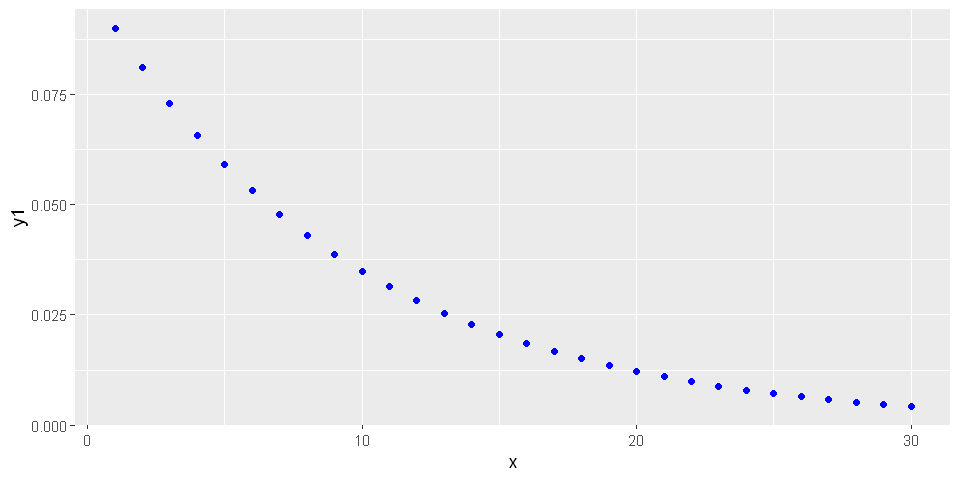

In [9]:
x = 1:30

# size = target number of successful trials, size > 0
# prob = probability of success in each trial, 0 <= prob <= 1
y1 = dnbinom(x, size=1, prob=0.1)

# Build a dataframe for plotting purposes
df = data.frame(x=x, y=y1)

ggplot(df, aes(x=x)) + 
    geom_point(aes(y=y1), color="blue")

## Bayesian Inference

In [21]:
# Generate the data
n = 1
p = 0.2
samples = rnbinom(n=20, size=n, prob=p)

cat(samples)

7 0 1 0 12 0 2 3 7 12 1 9 4 6 4 7 4 11 1 0

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 20
   Unobserved stochastic nodes: 2
   Total graph size: 26

Initializing model



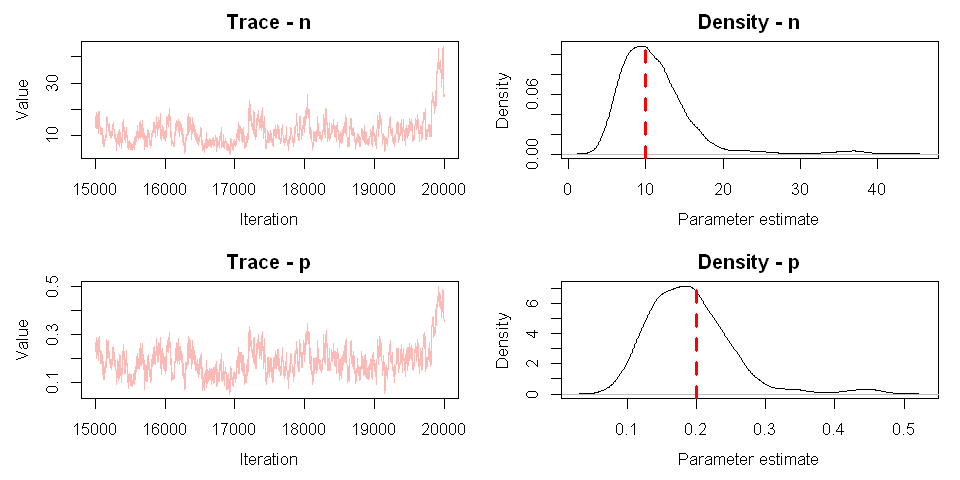

In [20]:
# Infer the parameters of the Negative Binomial distribution using JAGS
model_string = "
model {
    # Prior
    p ~ dbeta(1,1)  # Probability of a success
    n ~ dunif(0,50)

    # Likelihood
    for (i in 1:N_samples) {
        y[i] ~ dnegbin(p, n)
    }
}
"

model = jags.model(textConnection(model_string),
                   data = list(y=samples, 
                               N_samples=length(samples)))

update(model, 10000, progress.bar="none")

samp <- coda.samples(model, 
                     variable.names=c("n", "p"), 
                     n.iter=20000, progress.bar="none")

gv = c(n, p)
MCMCtrace(samp, 
          gv=gv,
          pdf=FALSE)